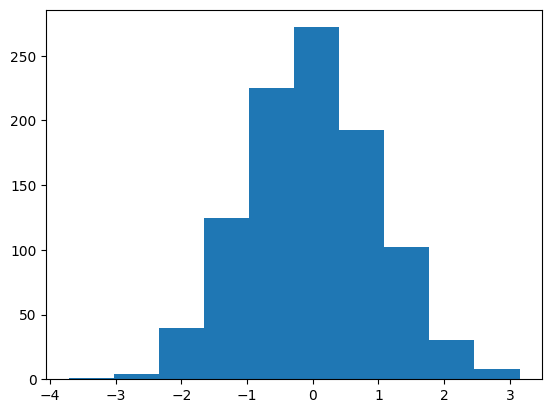

Files already downloaded and verified
162770
(tensor([[[ 0.9843,  0.9843,  0.9843,  ...,  0.9294,  1.0000,  0.9922],
         [ 0.9843,  0.9843,  0.9843,  ...,  0.9451,  1.0000,  0.9922],
         [ 0.9843,  0.9843,  0.9843,  ...,  0.9608,  1.0000,  1.0000],
         ...,
         [ 0.0980, -0.0980,  0.1451,  ..., -0.0431, -0.0353, -0.0431],
         [ 0.0196,  0.0824,  0.3020,  ..., -0.0745, -0.0588, -0.0745],
         [ 0.3176,  0.6000,  0.9216,  ..., -0.0745, -0.0588, -0.0588]],

        [[ 0.8118,  0.8118,  0.8118,  ...,  0.7882,  0.8588,  0.8667],
         [ 0.8118,  0.8118,  0.8118,  ...,  0.8039,  0.8588,  0.8667],
         [ 0.8118,  0.8118,  0.8118,  ...,  0.8196,  0.8667,  0.8745],
         ...,
         [-0.4196, -0.6157, -0.3882,  ..., -0.5686, -0.5608, -0.5608],
         [-0.5137, -0.4510, -0.2314,  ..., -0.6157, -0.6078, -0.6000],
         [-0.2157,  0.0667,  0.3882,  ..., -0.6157, -0.6078, -0.6078]],

        [[ 0.5216,  0.5216,  0.5216,  ...,  0.6941,  0.7490,  0.7412],

(tensor([[[ 0.9843,  0.9843,  0.9843,  ...,  0.9294,  1.0000,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9451,  1.0000,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9608,  1.0000,  1.0000],
          ...,
          [ 0.0980, -0.0980,  0.1451,  ..., -0.0431, -0.0353, -0.0431],
          [ 0.0196,  0.0824,  0.3020,  ..., -0.0745, -0.0588, -0.0745],
          [ 0.3176,  0.6000,  0.9216,  ..., -0.0745, -0.0588, -0.0588]],
 
         [[ 0.8118,  0.8118,  0.8118,  ...,  0.7882,  0.8588,  0.8667],
          [ 0.8118,  0.8118,  0.8118,  ...,  0.8039,  0.8588,  0.8667],
          [ 0.8118,  0.8118,  0.8118,  ...,  0.8196,  0.8667,  0.8745],
          ...,
          [-0.4196, -0.6157, -0.3882,  ..., -0.5686, -0.5608, -0.5608],
          [-0.5137, -0.4510, -0.2314,  ..., -0.6157, -0.6078, -0.6000],
          [-0.2157,  0.0667,  0.3882,  ..., -0.6157, -0.6078, -0.6078]],
 
         [[ 0.5216,  0.5216,  0.5216,  ...,  0.6941,  0.7490,  0.7412],
          [ 0.5216,  0.5216,

In [1]:
from torch import normal
from torch import tensor
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython.display import display
mean=0
std=1

samples=normal(mean, std, size=(1, 1000))

plt.hist(samples)
plt.show()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

celebs=datasets.CelebA(root='./celeb/', 
                       transform=transform,
                       download=True)

print(len(celebs))

print(celebs[0])
print(type(celebs[0]))
display(celebs[0])

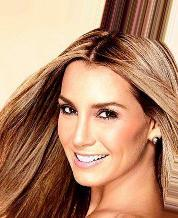

In [6]:
import torchvision as tv
display_trans=tv.transforms.ToPILImage()

# Returns PIL Image from tensor data with pixel RGB values ranging from -1 to 1
def tensorToImage(t):
    display_trans=tv.transforms.ToPILImage()
    return display_trans((t+1)/2)

tensorToImage(celebs[0][0])

In [5]:
# tensor of feature attributes
celebs[0][1]

tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [6]:
import torch
im=celebs[0][0]

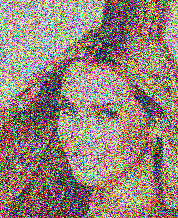

In [70]:
pixels=im.load()
for k in range(10):
    for i in range(im.size[0]):
        for j in range(im.size[1]):
            new_color=normal(tensor(pixels[i,j], dtype=torch.float),tensor((40,40,40), dtype=torch.float)).tolist()
            new_color=tuple([round(x) for x in new_color])
            im.putpixel((i,j),new_color)
im


In [12]:
from math import sqrt
def add_noise(image, var):
    pixels=image.load()
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            new_color=normal(tensor([sqrt(1-var)*x for x in pixels[i,j]], dtype=torch.float),tensor((var*255, var*255, var*255), dtype=torch.float)).tolist()
            new_color=tuple([round(x) for x in new_color])
            im.putpixel((i,j),new_color)
    return image

In [30]:
im=celebs[0][0]

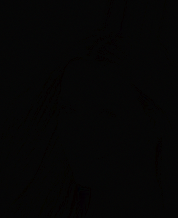

In [31]:
for i in range(100):
    im=add_noise(im, 0.1)
im